In [22]:
# import packages
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib import style

In [81]:
# input N
N = 10000

# Parameters -- to be read from config file
ns = 10
industry_sectors = np.arange(ns)
industry_sector_names = ['Computer s/w', 'Hotels and resorts', 'Cloth manufatcuring', 'Construction', 'Electronics component manufacturing',
'Chemical manufacturing', 'Insurance agency', 'Jewelers','Medical and nursing services','Pharmaceuticals'
]
p_industry_sector = [0.2, 0.1, 0.05, 0.1, 0.05, 0.05, 0.05, 0.1, 0.1, 0.2]
#industry categorization
bulk = [3, 5]
semi_bulk = [2, 4, 6]
retail = [0, 1, 7, 8, 9]
locations = ['INDIA', 'OFFSHORE']
p_locations = [0.99, 0.01]
is_tax_haven = ['YES', 'NO']
p_tax_haven = [0.99, 0.01]
num_owners = [1, 2, 3, 4, 5]
p_owners = [0.45, 0.3, 0.2, 0.025, 0.025]
is_private = ['YES', 'NO']
p_is_private = [0.5, 0.5]
employee_base = ['VERY SMALL', 'SMALL', 'MEDIUM', 'LARGE', 'VERY LARGE', 'EXTRA LARGE']
p_emp_base = [0.2, 0.24, 0.24, 0.18, 0.07, 0.07]
rev_per_emp_month_size = ['VERY LOW', 'LOW', 'MEDIUM', 'HIGH', 'VERY HIGH', 'EXTRA HIGH']
rev_categorization = [[8], [2, 4 ,5], [6, 9], [1, 3], [7], [0]]
p_rev_per_emp_month_size = [0.2, 0.2, 0.3, 0.2, 0.05,0.05]


In [82]:
# Generate lists based on probability distribution of parameters
c_id = np.arange(N)
c_sector = np.random.choice(industry_sectors, N, p=p_industry_sector)
c_loc = np.random.choice(locations, N, p=p_locations)
c_n_owners = np.random.choice(num_owners, N, p=p_owners)
c_is_private = np.random.choice(is_private, N, p=p_is_private)
c_emp_base = np.random.choice(employee_base, N, p=p_emp_base)


# zip each item in the list to form tuples
c_list = list(zip(c_id, c_sector, c_loc, c_n_owners, c_is_private, c_emp_base))

# Form dataframe out of list
c_dataframe = pd.DataFrame(data = c_list, columns=['comp_id', 'industry_sector', 'location', 'num_owners', 'is_private', 'emp_base'])

# Generate calculated columns

# Insert columns in dataframe for is_tax_haven, num_employees, industry_category, annual_revenue, net_revenue
c_dataframe.insert(loc=3, column='is_tax_haven', value='')
c_dataframe.insert(loc=7, column='num_employees', value = np.zeros([N, 1], dtype=int))
c_dataframe.insert(loc=8, column='industry_category', value = np.zeros([N, 1], dtype=int))
c_dataframe.insert(loc=9, column='rev_per_emp_month_size', value = '')
c_dataframe.insert(loc=10, column='annual_revenue', value = np.zeros([N, 1], dtype=float))
c_dataframe.insert(loc=11, column='net_revenue', value = np.zeros([N, 1], dtype=float))


In [87]:
# Generation of number of employees
e_mu1, e_sigma1 = 30, 7
e_mu2, e_sigma2 = 200, 50
e_mu3, e_sigma3 = 1600, 400
e_mu4, e_sigma4 = 8500, 2125
e_mu5, e_sigma5 = 32000, 8000
e_mu6, e_sigma6 = 98000, 24500
'''
e_size1 =  len(c_dataframe.loc[c_dataframe.loc[:, 'emp_base'] == 'VERY SMALL'])
e_size2 =  len(c_dataframe.loc[c_dataframe.loc[:, 'emp_base'] == 'SMALL'])
e_size3 =  len(c_dataframe.loc[c_dataframe.loc[:, 'emp_base'] == 'MEDIUM'])
e_size4 =  len(c_dataframe.loc[c_dataframe.loc[:, 'emp_base'] == 'LARGE'])
e_size5 =  len(c_dataframe.loc[c_dataframe.loc[:, 'emp_base'] == 'VERY LARGE'])
e_size6 =  len(c_dataframe.loc[c_dataframe.loc[:, 'emp_base'] == 'EXTRA LARGE'])
'''

e_x_vsmall = np.random.normal(e_mu1, e_sigma1, N)
e_x_small = np.random.normal(e_mu2, e_sigma2, N)
e_x_med = np.random.normal(e_mu3, e_sigma3, N)
e_x_large = np.random.normal(e_mu4, e_sigma4, N)
e_x_vlarge = np.random.normal(e_mu5, e_sigma5, N)
e_x_xlarge = np.random.normal(e_mu6, e_sigma6, N)

e_y_vsmall = np.random.normal(0.1 * e_x_vsmall, abs(0.01 * e_x_vsmall), N)
e_y_small = np.random.normal(0.1 * e_x_small, abs(0.01 * e_x_small), N)
e_y_med = np.random.normal(0.1 * e_x_med, abs(0.01 * e_x_med), N)
e_y_large = np.random.normal(0.1 * e_x_large, abs(0.01 * e_x_large), N)
e_y_vlarge = np.random.normal(0.1 * e_x_vlarge, abs(0.01 * e_x_vlarge), N)
e_y_xlarge = np.random.normal(0.1 * e_x_xlarge, abs(0.01 * e_x_xlarge), N)

e_z_vsmall = np.random.normal(e_x_vsmall, abs(e_y_vsmall))
e_z_small = np.random.normal(e_x_small,  abs(e_y_small))
e_z_med = np.random.normal(e_x_med, abs(e_y_med))
e_z_large = np.random.normal(e_x_large, abs(e_y_large))
e_z_vlarge = np.random.normal(e_x_vlarge, abs(e_y_vlarge))
e_z_xlarge = np.random.normal(e_x_xlarge, abs(e_y_xlarge))

# Dictionary for generating number of employees
def get_num_emp (x):
    return {
        'VERY SMALL': int(np.random.choice(e_z_vsmall)),
        'SMALL': int(np.random.choice(e_z_small)),
        'MEDIUM': int(np.random.choice(e_z_med)),
        'LARGE': int(np.random.choice(e_z_large)),
        'VERY LARGE': int(np.random.choice(e_z_vlarge)),
        'EXTRA LARGE': int(np.random.choice(e_z_xlarge))
    }[x]

In [88]:
# Normal distributions for annual_revenue

mu1, sigma1 = 20000, 4000
mu2, sigma2 = 70000, 14000
mu3, sigma3 = 150000, 15000
mu4, sigma4 = 250000, 25000
mu5, sigma5 = 550000, 40000
mu6, sigma6 = 800000, 65000

x_very_low = np.random.normal(mu1, sigma1, N)
x_low = np.random.normal(mu2, sigma2, N)
x_medium = np.random.normal(mu3, sigma3, N)
x_high = np.random.normal(mu4, sigma4, N)
x_very_high = np.random.normal(mu5, sigma5, N)
x_extra_high = np.random.normal(mu6, sigma6, N)

y_very_low = np.random.normal(0.1 * x_very_low, 0.01 * x_very_low, N)
y_low = np.random.normal(0.1 * x_low, 0.01 * x_low, N)
y_medium = np.random.normal(0.1 * x_medium, 0.01 * x_medium, N)
y_high = np.random.normal(0.1 * x_high, 0.01 * x_high, N)
y_very_high = np.random.normal(0.1 * x_very_high, 0.01 * x_very_high, N)
y_extra_high = np.random.normal(0.1 * x_extra_high, 0.01 * x_extra_high, N)

z_very_low = np.random.normal(x_very_low, y_very_low)
z_low = np.random.normal(x_low, y_low)
z_medium = np.random.normal(x_medium, y_medium)
z_high = np.random.normal(x_high, y_high)
z_very_high = np.random.normal(x_very_high, y_very_high)
z_extra_high = np.random.normal(x_extra_high, y_extra_high)

def get_annual_rev (x):
    return{
        'VERY LOW': np.round(random.choice(z_very_low), 2),
        'LOW': np.round(random.choice(z_low), 2),
        'MEDIUM': np.round(random.choice(z_medium), 2),
        'HIGH': np.round(random.choice(z_high), 2),
        'VERY HIGH': np.round(random.choice(z_very_high), 2),
        'EXTRA HIGH': np.round(random.choice(z_extra_high), 2)
    }[x]

In [89]:
# industry categorization
def get_industry_cat (x):
    return{
        0: 'r',
        1: 'r',
        2: 's',
        3: 'b',
        4: 's',
        5: 'b',
        6: 's',
        7: 'r',
        8: 'r',
        9: 'r'
    } [x]

# Function for getting revenue per employee per month categorization

def find_rev_size(sector_id):
    for i, val in enumerate(rev_categorization):
        if sector_id in rev_categorization[i]:
            return rev_per_emp_month_size[i]



# Distribution of for profit and loss
def getPL():
    percent_pl=np.zeros((N))
    isPL = np.random.choice([1, 0], N, p=[0.9, 0.1])
    
    for i in range (N):
        if (isPL[i]): percent_pl[i] = np.random.choice(1* np.random.normal(10, 3, N))
        else: percent_pl[i] = np.random.choice(np.random.normal(-8, 2, N))
        
    return percent_pl

percent_pl = getPL()

c_dataframe.set_index('comp_id')

,industry_sector,location,is_tax_haven,num_owners,is_private,emp_base,num_employees,industry_category,rev_per_emp_month_size,annual_revenue,net_revenue
comp_id,,,,,,,,,,,
0,8,INDIA,,3,NO,VERY SMALL,0,0,,0.0,0.0
1,8,INDIA,,3,YES,VERY LARGE,0,0,,0.0,0.0
2,1,INDIA,,1,YES,SMALL,0,0,,0.0,0.0
3,1,INDIA,,2,NO,MEDIUM,0,0,,0.0,0.0
4,0,INDIA,,2,NO,MEDIUM,0,0,,0.0,0.0
5,9,INDIA,,1,YES,SMALL,0,0,,0.0,0.0
6,0,INDIA,,3,YES,SMALL,0,0,,0.0,0.0
7,3,INDIA,,1,NO,SMALL,0,0,,0.0,0.0
8,3,INDIA,,3,YES,EXTRA LARGE,0,0,,0.0,0.0


In [90]:
# Calculated columns
for comp_id in range(N):
    if(c_dataframe.loc[comp_id, 'location'] == 'INDIA'):
        c_dataframe.loc[comp_id, 'is_tax_haven'] = 'NO'
    else:
        c_dataframe.loc[comp_id, 'is_tax_haven'] = np.random.choice(is_tax_haven, p=p_tax_haven)

    c_dataframe.loc[comp_id, 'num_employees'] = get_num_emp(c_dataframe.loc[comp_id, 'emp_base']) # Uniform probability for number of employees
    c_dataframe.loc[comp_id, 'industry_category'] = get_industry_cat(c_dataframe.loc[comp_id, 'industry_sector']) # Assign industry category based on industry sector
    c_dataframe.loc[comp_id, 'rev_per_emp_month_size'] = find_rev_size(c_dataframe.loc[comp_id, 'industry_sector'])
    #c_dataframe.loc[comp_id, 'rev_per_emp_month_size'] = np.random.choice(rev_per_emp_month_size, p=p_rev_per_emp_month_size)
    c_dataframe.loc[comp_id, 'annual_revenue'] = np.round(12 * c_dataframe.loc[comp_id, 'num_employees'] * get_annual_rev(c_dataframe.loc[comp_id, 'rev_per_emp_month_size']), 2) # annual_revenue = 12 * num_employees * revenue per employee per month
    c_dataframe.loc[comp_id, 'net_revenue'] = np.round(percent_pl[comp_id] * c_dataframe.loc[comp_id, 'annual_revenue'] / 100, 2)


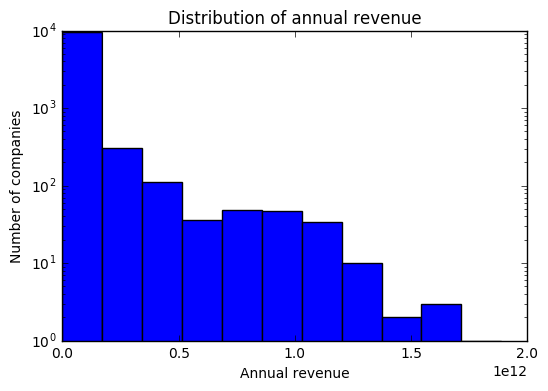

In [91]:
annual_rev = c_dataframe.loc[:, 'annual_revenue']
bins = 11
plt.hist(annual_rev, bins)
plt.xlabel('Annual revenue')
plt.ylabel('Number of companies')
plt.title('Distribution of annual revenue')
#plt.legend()
plt.yscale('log')
#plt.xscale('log')

plt.show()



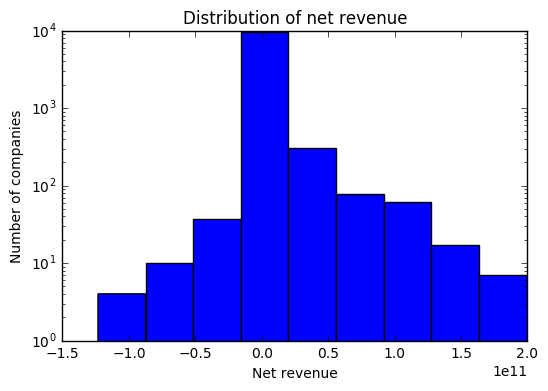

In [92]:
net_rev = c_dataframe.loc[:, 'net_revenue']
bins = 9
plt.hist(net_rev, bins)
plt.xlabel('Net revenue')
plt.ylabel('Number of companies')
plt.title('Distribution of net revenue')
#plt.legend()
plt.yscale('log')
#plt.xscale('log')

plt.show()

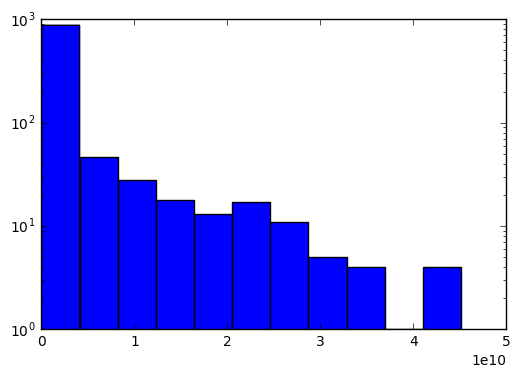

Median:  259968447.24 Min:  1726372.56 Max:  45101694990.6


In [93]:
size = 'VERY LOW'

R = (c_dataframe.loc[c_dataframe.loc[:, 'rev_per_emp_month_size'] == size]).loc[:, 'annual_revenue']
bins = 11

plt.hist(R, bins)
plt.yscale('log')

plt.show()

print('Median: ', np.median(R), 'Min: ', np.min(R), 'Max: ', np.max(R))


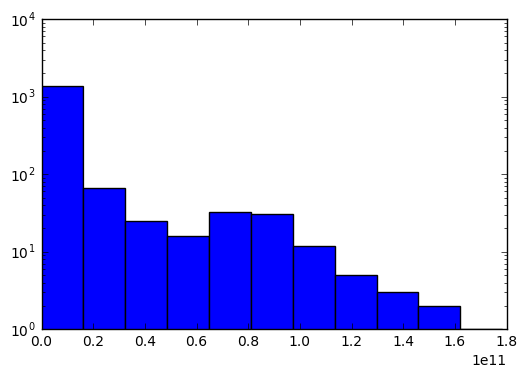

Median:  1039833655.44 Min:  5611410.0 Max:  178316447787.0


In [94]:
size = 'LOW'

R = (c_dataframe.loc[c_dataframe.loc[:, 'rev_per_emp_month_size'] == size]).loc[:, 'annual_revenue']
bins = 11

plt.hist(R, bins)
plt.yscale('log')

plt.show()

print('Median: ', np.median(R), 'Min: ', np.min(R), 'Max: ', np.max(R))

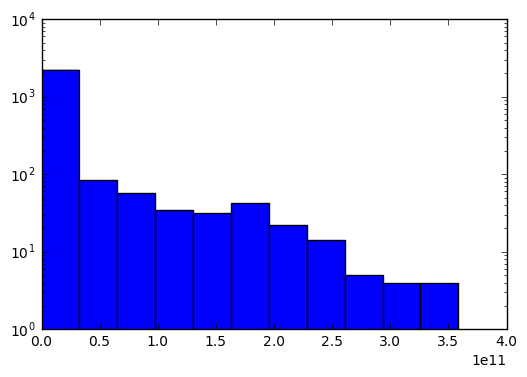

Median:  2174313130.14 Min:  9696510.6 Max:  358486161163.0


In [95]:
size = 'MEDIUM'

R = (c_dataframe.loc[c_dataframe.loc[:, 'rev_per_emp_month_size'] == size]).loc[:, 'annual_revenue']
bins = 11

plt.hist(R, bins)
plt.yscale('log')

plt.show()

print('Median: ', np.median(R), 'Min: ', np.min(R), 'Max: ', np.max(R))

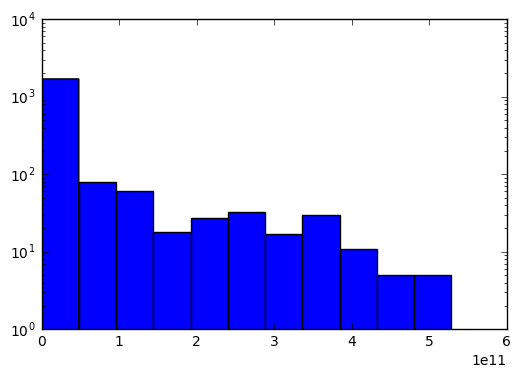

Median:  3904298836.56 Min:  16191229.8 Max:  528968328138.0


In [96]:
size = 'HIGH'

R = (c_dataframe.loc[c_dataframe.loc[:, 'rev_per_emp_month_size'] == size]).loc[:, 'annual_revenue']
bins = 11

plt.hist(R, bins)
plt.yscale('log')

plt.show()

print('Median: ', np.median(R), 'Min: ', np.min(R), 'Max: ', np.max(R))

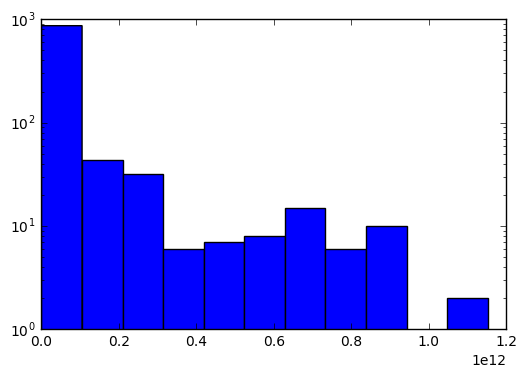

Median:  6617028952.02 Min:  71017215.72 Max:  1.15172688433e+12


In [97]:
size = 'VERY HIGH'

R = (c_dataframe.loc[c_dataframe.loc[:, 'rev_per_emp_month_size'] == size]).loc[:, 'annual_revenue']
bins = 11

plt.hist(R, bins)
plt.yscale('log')

plt.show()

print('Median: ', np.median(R), 'Min: ', np.min(R), 'Max: ', np.max(R))

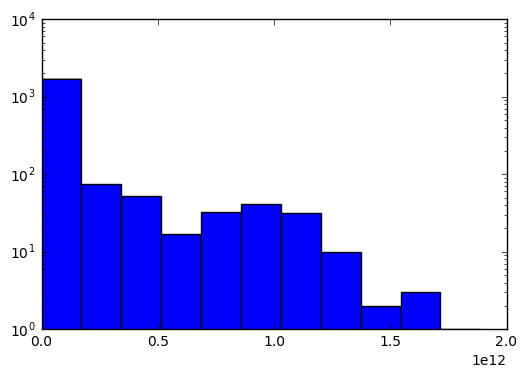

Median:  11855250363.2 Min:  91966180.68 Max:  1.8871572482e+12


In [98]:
size = 'EXTRA HIGH'

R = (c_dataframe.loc[c_dataframe.loc[:, 'rev_per_emp_month_size'] == size]).loc[:, 'annual_revenue']
bins = 11

plt.hist(R, bins)
plt.yscale('log')

plt.show()

print('Median: ', np.median(R), 'Min: ', np.min(R), 'Max: ', np.max(R))

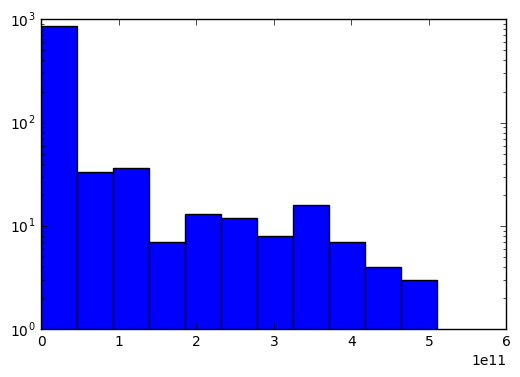

Median:  3845816668.44 Min:  16191229.8 Max:  510145170749.0


In [99]:
sector = 1

R = (c_dataframe.loc[c_dataframe.loc[:, 'industry_sector'] == sector]).loc[:, 'annual_revenue']
bins = 11

plt.hist(R, bins)
plt.yscale('log')

plt.show()

print('Median: ', np.median(R), 'Min: ', np.min(R), 'Max: ', np.max(R))


In [102]:
plt.scatter (industry_sectors, annual_rev, c='b', alpha=0.5)
plt.show()

ValueError: x and y must be the same size